In [615]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [1183]:
data = pd.read_csv('./Downloads/The Global Dataset 3 Sept 2018.csv',
                   infer_datetime_format=True)

C:\Users\algc_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1184]:
data.head()

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
1,NaN,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
2,NaN,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
3,NaN,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
4,NaN,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1


In [1185]:
for col in data.columns: 
    print(col)

By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use
yearOfRegistration
Datasource
gender
ageBroad
majorityStatus
majorityStatusAtExploit
majorityEntry
citizenship
meansOfControlDebtBondage
meansOfControlTakesEarnings
meansOfControlRestrictsFinancialAccess
meansOfControlThreats
meansOfControlPsychologicalAbuse
meansOfControlPhysicalAbuse
meansOfControlSexualAbuse
meansOfControlFalsePromises
meansOfControlPsychoactiveSubstances
meansOfControlRestrictsMovement
meansOfControlRestrictsMedicalCare
meansOfControlExcessiveWorkingHours
meansOfControlUsesChildren
meansOfControlThreatOfLawEnforcement
meansOfControlWithholdsNecessities
meansOfControlWithholdsDocuments
meansOfControlOther
meansOfControlNotSpecified
meansOfControlConcatenated
isForcedLabour
isSexualExploit
isOtherExploit
isSexAndLabour
isForcedMarriage
isForcedMilitary
isOrganRemoval
typeOfExploitConcatenated
typeOfLabourAgriculture
typeOfLabourAquafarming
typeOfLabourBegging
typeOfLabourC

In [1186]:
data.drop(['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use'],
          axis=1, inplace=True)

In [1187]:
data.shape

(55434, 62)

In [1188]:
data.dtypes

yearOfRegistration                   int64
Datasource                          object
gender                              object
ageBroad                            object
majorityStatus                      object
                                     ...  
recruiterRelationIntimatePartner     int64
recruiterRelationFriend              int64
recruiterRelationFamily              int64
recruiterRelationOther               int64
recruiterRelationUnknown             int64
Length: 62, dtype: object

In [1189]:
data.isnull().sum()

yearOfRegistration                  0
Datasource                          0
gender                              0
ageBroad                            0
majorityStatus                      0
                                   ..
recruiterRelationIntimatePartner    0
recruiterRelationFriend             0
recruiterRelationFamily             0
recruiterRelationOther              0
recruiterRelationUnknown            0
Length: 62, dtype: int64

In [1190]:
data['recruiterRelationFamily'].value_counts()

 0     40639
-99    13121
 1      1674
Name: recruiterRelationFamily, dtype: int64

In [1191]:
for col in data.columns:
    data.loc[data[col].isin([-99, '-99', 'Unknown', 'NaN']), col] = None

In [1192]:
data['recruiterRelationFamily'].value_counts()

0.0    40639
1.0     1674
Name: recruiterRelationFamily, dtype: int64

In [1193]:
data.head(2)

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002.0,Case Management,None,None,None,None,None,None,NaN,NaN,...,NaN,None,NaN,None,None,0.0,0.0,0.0,0.0,1.0
1,2002.0,Case Management,None,None,None,None,None,None,NaN,NaN,...,NaN,None,NaN,None,None,0.0,0.0,0.0,0.0,1.0


In [1194]:
data.isnull().sum()

yearOfRegistration                      0
Datasource                              0
gender                                639
ageBroad                            21213
majorityStatus                      15323
                                    ...  
recruiterRelationIntimatePartner    13121
recruiterRelationFriend             13121
recruiterRelationFamily             13121
recruiterRelationOther              13121
recruiterRelationUnknown                0
Length: 62, dtype: int64

In [1195]:
# quantify features
data['sum_mean_control'] = data[['meansOfControlDebtBondage', 
                                'meansOfControlTakesEarnings', 
                                'meansOfControlRestrictsFinancialAccess',
                                'meansOfControlThreats', 
                                'meansOfControlPsychologicalAbuse',
                                'meansOfControlSexualAbuse', 
                                'meansOfControlFalsePromises', 
                                'meansOfControlPhysicalAbuse',
                                'meansOfControlPsychoactiveSubstances',
                                'meansOfControlRestrictsMovement', 
                                'meansOfControlRestrictsMedicalCare', 
                                'meansOfControlExcessiveWorkingHours', 
                                'meansOfControlUsesChildren', 
                                'meansOfControlThreatOfLawEnforcement',
                                'meansOfControlWithholdsNecessities',
                                'meansOfControlWithholdsDocuments',
                                'meansOfControlOther', 
                                'meansOfControlNotSpecified']].sum(axis=1)

data['sum_mean_control'].sum()

73148.0

In [1196]:
data['victim_count'] = data[['isForcedLabour', 'isSexualExploit', 
                             'isOtherExploit', 'isSexAndLabour',
                             'isForcedMarriage', 'isForcedMilitary',
                             'isOrganRemoval']].sum(axis=1)

data['victim_count'].sum()

36471.0

In [1197]:
data['sum_labor_exp'] = data[['typeOfLabourAgriculture', 'typeOfLabourAquafarming', 
                             'typeOfLabourBegging', 'typeOfLabourConstruction', 
                             'typeOfLabourDomesticWork', 'typeOfLabourHospitality', 
                             'typeOfLabourIllicitActivities', 'typeOfLabourManufacturing', 
                             'typeOfLabourMiningOrDrilling', 'typeOfLabourPeddling', 
                             'typeOfLabourTransportation', 'typeOfLabourOther', 
                             'typeOfLabourNotSpecified']].sum(axis=1)

data['sum_labor_exp'].sum()

7520.0

In [1198]:
data['sum_sex_exp'] = data[['typeOfSexProstitution', 
                            'typeOfSexPornography',
                            'typeOfSexRemoteInteractiveServices', 
                            'typeOfSexPrivateSexualServices']].sum(axis=1)

data['sum_sex_exp'].sum()

5769.0

In [1199]:
data.tail(2)

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,sum_mean_control,victim_count,sum_labor_exp,sum_sex_exp
55432,2018.0,Case Management,Male,None,None,Minor,None,KH,0.0,0.0,...,KH,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
55433,2018.0,Case Management,Male,None,None,Adult,None,KH,0.0,0.0,...,KH,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [1201]:
# eliminiate the features that are no longer useful:
data.drop(['meansOfControlDebtBondage', 'meansOfControlTakesEarnings', 
           'meansOfControlRestrictsFinancialAccess', 
           'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
           'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
           'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
           'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
           'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
           'meansOfControlThreatOfLawEnforcement','meansOfControlWithholdsNecessities',
           'meansOfControlWithholdsDocuments', 'meansOfControlOther',
           'meansOfControlNotSpecified', 'isForcedLabour', 'isSexualExploit',
           'isOtherExploit', 'isSexAndLabour', 'isForcedMarriage',
           'isForcedMilitary', 'isOrganRemoval','typeOfLabourAgriculture',
           'typeOfLabourAquafarming', 'typeOfLabourBegging',
           'typeOfLabourConstruction', 'typeOfLabourDomesticWork',
           'typeOfLabourHospitality', 'typeOfLabourIllicitActivities',
           'typeOfLabourManufacturing', 'typeOfLabourMiningOrDrilling',
           'typeOfLabourPeddling', 'typeOfLabourTransportation',
           'typeOfLabourOther', 'typeOfLabourNotSpecified', 
           'typeOfSexProstitution', 'typeOfSexPornography',
           'typeOfSexRemoteInteractiveServices', 'typeOfSexPrivateSexualServices',
           'recruiterRelationIntimatePartner', 'recruiterRelationFriend',
           'recruiterRelationFamily', 'recruiterRelationOther',
           'recruiterRelationUnknown'], axis=1, inplace=True)

In [1202]:
# changing the names
data.rename({'yearOfRegistration': 'year_registration', 'Datasource':
            'datasource', 'ageBroad': 'age', 'majorityStatus': 
            'majority_status', 'majorityStatusAtExploit': 'majority_exp',
            'majorityEntry': 'majority_entry', 'meansOfControlConcatenated':
            'means_control', 'typeOfExploitConcatenated': 'type_exploitation',
            'typeOfLabourConcatenated': 'labor_exp', 'typeOfSexConcatenated':
            'sexual_exp', 'isAbduction': 'is_abduction', 'RecruiterRelationship':
            'recruiter_relationship', 'CountryOfExploitation': 'country_exploitation'},
           axis=1, inplace=True)

In [1203]:
data.shape

(55434, 19)

In [1204]:
data['citizenship'].value_counts()

ZZ    12318
PH    11433
UA     7793
MD     7499
US     4159
KH     1949
ID     1947
BY     1517
MM     1281
RO      685
GH      545
KG      449
MX      444
HT      352
BG      342
UZ      261
AF      239
VN      185
GW      145
TH      144
LA      130
CO      124
NG      119
CN      115
MG       94
LK       85
SL       81
TJ       77
UG       70
SN       70
KZ       54
CD       53
AL       45
ML       45
BF       33
CI       31
NE       31
NP       27
TM       26
BO       18
GN       15
IN       15
ER       13
KR       12
BD       11
SV       11
Name: citizenship, dtype: int64

In [1205]:
data['country_exploitation'].value_counts()

US    16956
MD     5698
UA     5308
RU     2787
PH     1988
ID     1776
KH      983
MY      907
GH      545
AE      515
TH      453
BY      381
SN      370
BG      356
PL      352
HT      339
RO      273
TR      262
SA      257
QA      239
KZ      222
Y1      211
KW      210
MK      194
UZ      193
ZZ      188
BA      127
JP      123
UG      123
JO      108
TT       96
MG       94
OM       94
TJ       88
AF       84
SL       81
CN       79
LB       78
EC       54
CZ       54
AL       45
SY       41
SG       37
ZA       36
AR       36
TW       33
HK       31
IT       28
TM       26
AT       24
BH       22
MU       20
DK       17
VN       16
EG       13
MX       13
CY       12
Name: country_exploitation, dtype: int64

In [1206]:
# both citizenship and origin_country are written with code
# to import the codebook and substitute values:
countries = pd.read_csv('./Downloads/Countries.csv', encoding='latin-1')

In [1207]:
data['origin_country'] = data['citizenship'].map(countries.set_index('pattern')['replacement'])
data['origin_country'].value_counts()

Philippines (the)                         11433
Ukraine                                    7793
Moldova (the Republic of)                  7499
United States of America (the)             4159
Cambodia                                   1949
Indonesia                                  1947
Belarus                                    1517
Myanmar                                    1281
Romania                                     685
Ghana                                       545
Kyrgyzstan                                  449
Mexico                                      444
Haiti                                       352
Bulgaria                                    342
Uzbekistan                                  261
Afghanistan                                 239
Viet Nam                                    185
Guinea-Bissau                               145
Thailand                                    144
Lao People's Democratic Republic (the)      130
Colombia                                

C:\Users\algc_\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


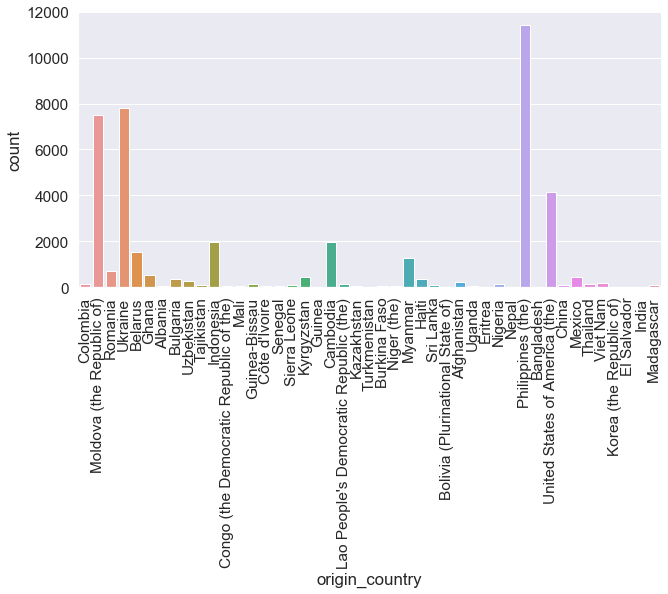

In [1208]:
victim_origin = sns.factorplot(data=data, x='origin_country', 
                               aspect=2.0, kind="count")
victim_origin.set_xticklabels(rotation=90)
plt.show()

In [1209]:
# creating two variables: one to count the entries in each country, and
# the other to establish the criteria for the top countries.
origin_counts = data['origin_country'].value_counts()
highest_origin = origin_counts[origin_counts >= 1000]
highest_origin
origin_counts = data['origin_country'].value_counts()
highest_origin = origin_counts[origin_counts >= 1000]
highest_origin

Philippines (the)                 11433
Ukraine                            7793
Moldova (the Republic of)          7499
United States of America (the)     4159
Cambodia                           1949
Indonesia                          1947
Belarus                            1517
Myanmar                            1281
Name: origin_country, dtype: int64

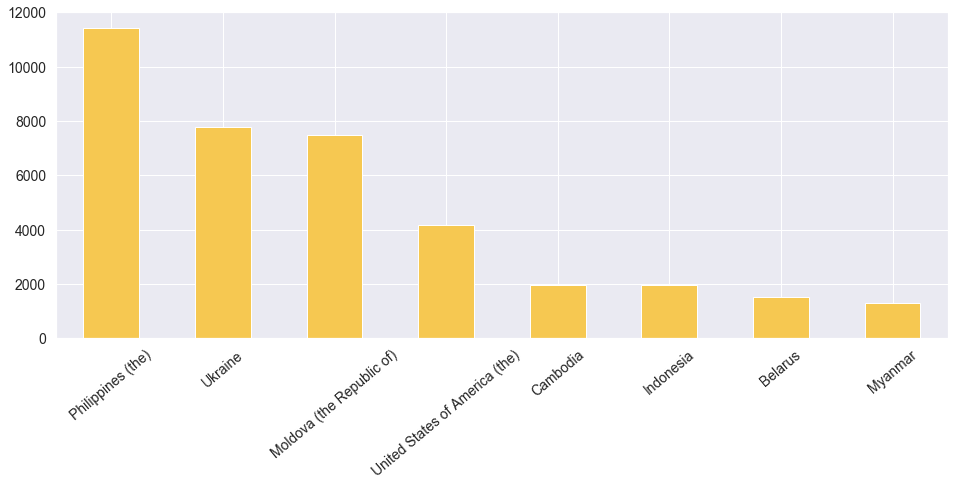

In [1210]:
highest_origin.plot(kind='bar', figsize=(16,6), rot=40, fontsize=14, color=('#F6C851'))

In [1211]:
data['full_country_exp'] = data['country_exploitation'].map(countries.set_index('pattern')['replacement'])
data['full_country_exp'].value_counts()

United States of America (the)    16956
Moldova (the Republic of)          5698
Ukraine                            5308
Russian Federation (the)           2787
Philippines (the)                  1988
Indonesia                          1776
Cambodia                            983
Malaysia                            907
Ghana                               545
United Arab Emirates (the)          515
Thailand                            453
Belarus                             381
Senegal                             370
Bulgaria                            356
Poland                              352
Haiti                               339
Romania                             273
Turkey                              262
Saudi Arabia                        257
Qatar                               239
Kazakhstan                          222
Kuwait                              210
North Macedonia                     194
Uzbekistan                          193
Bosnia and Herzegovina              127


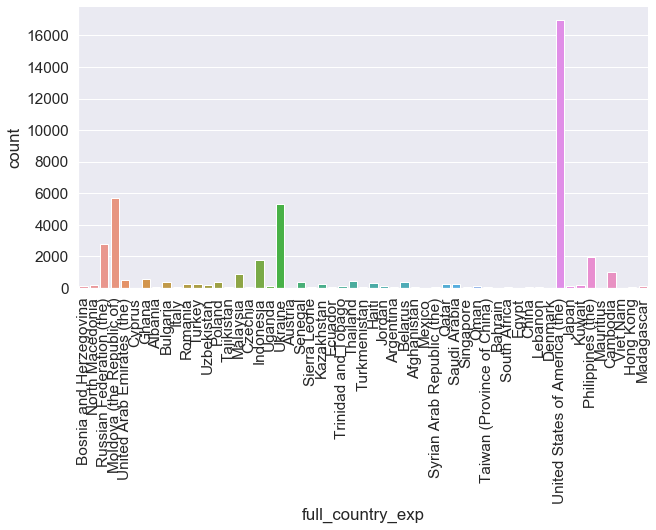

In [1212]:
place_exploitation = sns.factorplot(data=data, x='full_country_exp', 
                               aspect=2.0, kind="count")
place_exploitation.set_xticklabels(rotation=90)
plt.show()

In [1213]:
# creating two variables: one to count the entries in each country, and
# the other to establish the criteria for the top countries.
exp_country_counts = data['full_country_exp'].value_counts()
highest_cexp = exp_country_counts[exp_country_counts >= 1000]
highest_cexp

United States of America (the)    16956
Moldova (the Republic of)          5698
Ukraine                            5308
Russian Federation (the)           2787
Philippines (the)                  1988
Indonesia                          1776
Name: full_country_exp, dtype: int64

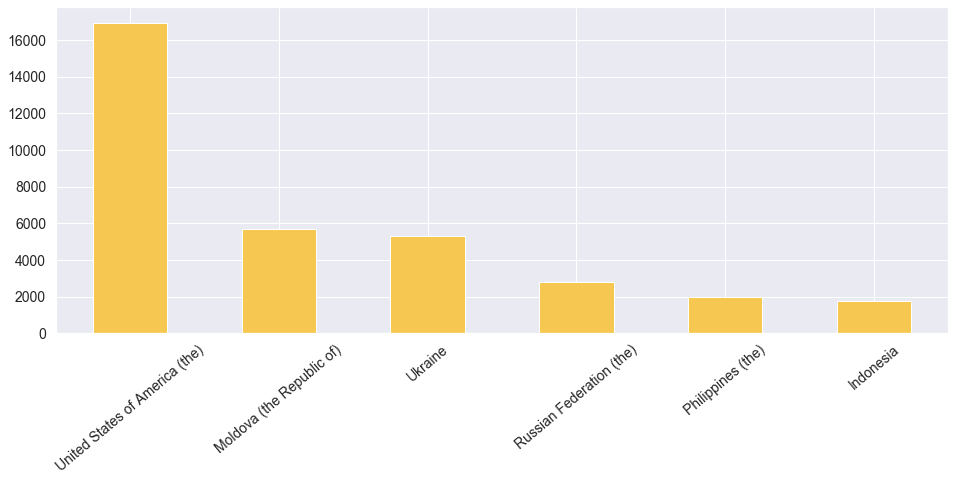

In [1214]:
highest_cexp.plot(kind='bar', figsize=(16,6), rot=40, fontsize=14, color=('#F6C851'))

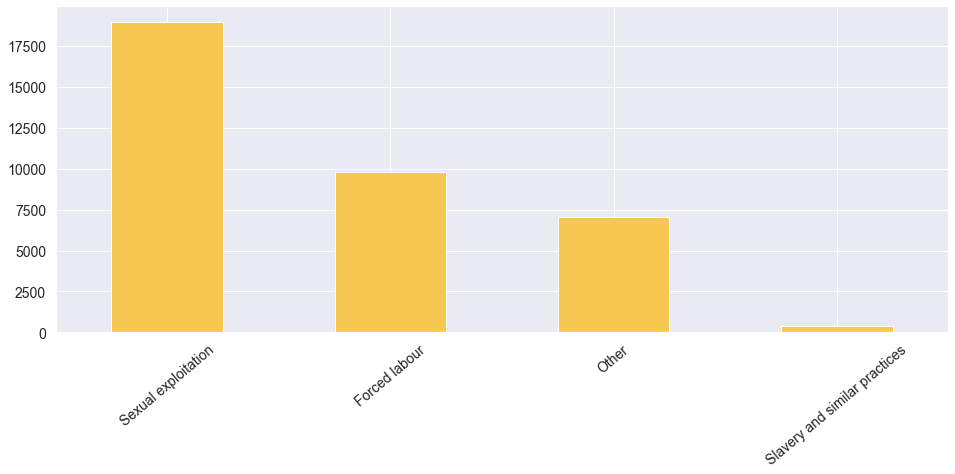

In [1215]:
# plot the most common types of exploitation by count:
exp_counts = data['type_exploitation'].value_counts()
highest_exp = exp_counts[exp_counts >= 200]
highest_exp.plot(kind='bar', figsize=(16,6), rot=40, fontsize=14, color=('#F6C851'))

In [1216]:
data['type_exploitation'].value_counts()

Sexual exploitation                                                          18979
Forced labour                                                                 9815
Other                                                                         7066
Slavery and similar practices                                                  374
Forced marriage                                                                154
Forced labour;Sexual exploitation;Combined sexual and labour exploitation      152
Forced labour;Slavery and similar practices                                      1
Name: type_exploitation, dtype: int64

[Text(0, 0, 'Sexual'),
 Text(0, 0, 'Labor'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Slavery'),
 Text(0, 0, 'Forced Marriage'),
 Text(0, 0, 'Combined')]

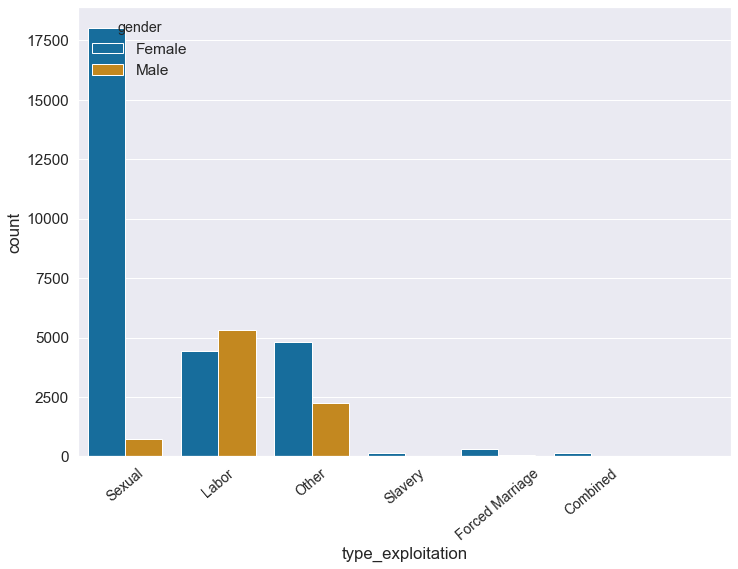

In [1219]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(x='type_exploitation',hue='gender', data=data, palette='colorblind')
chart.set_xticklabels(labels=['Sexual', 'Labor', 'Other', 'Slavery', 'Forced Marriage', 'Combined'], rotation=40, fontsize=14)

### Dummy variables

In [1220]:
# creating dummy variables
# first, entries:
data['type_exploitation'].value_counts()

Sexual exploitation                                                          18979
Forced labour                                                                 9815
Other                                                                         7066
Slavery and similar practices                                                  374
Forced marriage                                                                154
Forced labour;Sexual exploitation;Combined sexual and labour exploitation      152
Forced labour;Slavery and similar practices                                      1
Name: type_exploitation, dtype: int64

In [1221]:
data.loc[data['type_exploitation'] == 'Forced labour;Sexual exploitation;Combined sexual and labour exploitation']

,year_registration,datasource,gender,age,majority_status,majority_exp,majority_entry,citizenship,means_control,type_exploitation,...,sexual_exp,is_abduction,recruiter_relationship,country_exploitation,sum_mean_control,victim_count,sum_labor_exp,sum_sex_exp,origin_country,full_country_exp
24431,2015.0,Hotline,Female,None,Minor,Minor,None,ZZ,Restricts movement,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
24432,2015.0,Hotline,Female,None,None,None,None,ZZ,Psychoactive substances,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
24433,2015.0,Hotline,Female,None,Adult,None,None,ZZ,Not specified,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
24434,2015.0,Hotline,Female,None,Adult,None,None,ZZ,Restricts movement,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
24435,2015.0,Hotline,Female,None,Adult,None,None,ZZ,Not specified,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54079,2017.0,Hotline,None,None,None,None,None,ZZ,Not specified,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
54080,2017.0,Hotline,None,None,None,None,None,ZZ,Not specified,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
54081,2017.0,Hotline,None,None,Adult,None,None,ZZ,Other,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)
54082,2017.0,Hotline,None,None,Minor,Minor,None,ZZ,Other,Forced labour;Sexual exploitation;Combined sex...,...,None,NaN,None,US,1.0,3.0,1.0,0.0,NaN,United States of America (the)


In [1222]:
# since we have two combined features, we'll substitute those:

# explore columns and join:
x = pd.get_dummies(data['type_exploitation'])
data_dummies = data.join(x)

# convert binary individual columns 1
cols = ['Forced labour',
        'Sexual exploitation']
data_dummies.loc[data_dummies['Forced labour;Sexual exploitation;Combined sexual and labour exploitation'] >0,
                cols] = 1

# convert binary individual columns 2
cols = ['Forced labour', 
        'Slavery and similar practices']
data_dummies.loc[data_dummies['Forced labour;Slavery and similar practices'] > 0,
                cols] = 1

data_dummies = (data_dummies
               .drop(['Forced labour;Sexual exploitation;Combined sexual and labour exploitation',
                     'Forced labour;Slavery and similar practices'], 1))

x = pd.get_dummies(data['origin_country'])
data_dummies = data_dummies.join(x.loc[:,x.columns[1:]])


In [1223]:
len(data['country_exploitation'].unique())
# there are 58 different possible countries of exploitation,
# we'll go with the top 2 and 'other'

58

In [1224]:
data['country_exploitation'].value_counts()
# top 2 are US and MD

US    16956
MD     5698
UA     5308
RU     2787
PH     1988
ID     1776
KH      983
MY      907
GH      545
AE      515
TH      453
BY      381
SN      370
BG      356
PL      352
HT      339
RO      273
TR      262
SA      257
QA      239
KZ      222
Y1      211
KW      210
MK      194
UZ      193
ZZ      188
BA      127
JP      123
UG      123
JO      108
TT       96
MG       94
OM       94
TJ       88
AF       84
SL       81
CN       79
LB       78
EC       54
CZ       54
AL       45
SY       41
SG       37
ZA       36
AR       36
TW       33
HK       31
IT       28
TM       26
AT       24
BH       22
MU       20
DK       17
VN       16
EG       13
MX       13
CY       12
Name: country_exploitation, dtype: int64

In [1225]:
data_dummies.columns

Index(['year_registration', 'datasource', 'gender', 'age', 'majority_status',
       'majority_exp', 'majority_entry', 'citizenship', 'means_control',
       'type_exploitation', 'labor_exp', 'sexual_exp', 'is_abduction',
       'recruiter_relationship', 'country_exploitation', 'sum_mean_control',
       'victim_count', 'sum_labor_exp', 'sum_sex_exp', 'origin_country',
       'full_country_exp', 'Forced labour', 'Forced marriage', 'Other',
       'Sexual exploitation', 'Slavery and similar practices', 'Albania',
       'Bangladesh', 'Belarus', 'Bolivia (Plurinational State of)', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'China', 'Colombia',
       'Congo (the Democratic Republic of the)', 'Côte d'Ivoire',
       'El Salvador', 'Eritrea', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'India', 'Indonesia', 'Kazakhstan', 'Korea (the Republic of)',
       'Kyrgyzstan', 'Lao People's Democratic Republic (the)', 'Madagascar',
       'Mali', 'Mexico', 'Moldova (the Republic of)', '

In [1226]:
# we need to narrow down our response variable to three classes:
data_dummies['response'] = data_dummies['country_exploitation']
data_dummies.loc[~data_dummies['response'].isin([ 'US', 'MD']), 'response'] = 'other'
# we are saying to do the reverse '~' of isin, so if the response is not in 
# US or MD, it will be labeled 'other'

In [1227]:
# To do hypothesis testing, you need to know three thing:
# 1. Number of classes: 3 (US, MD and other)
# 2. Are variables independent or dependent? Independent
# 3. Does it have a parametric or non parametric distribution? TBD
## If parametric, we'll use the ANOVA test
## If non-parametric, we'll use the Kruskal-Wallis Test

In [1228]:
# Statistical significance is the likelihood that a result or relationship 
# is caused by something other than mere random chance. 
# Statistical hypothesis testing is traditionally employed to determine 
# whether or not a result is statistically significant.
# The probability of our observations occurring by chance, 
# given the null hypothesis, is the pvalue.


In [1229]:
print(len(data_dummies))
np.random.normal(len(data_dummies))

55434


55435.28378497673

In [1230]:
from scipy import stats

In [1231]:
# stats.normaltest(): Test whether a sample differs from a normal distribution.
# let's test US p value
p_value = stats.normaltest(data_dummies['United States of America (the)']).pvalue
p_value
# a p value of 0 means it's not parametric

0.0

In [1232]:
data_dummies.columns

Index(['year_registration', 'datasource', 'gender', 'age', 'majority_status',
       'majority_exp', 'majority_entry', 'citizenship', 'means_control',
       'type_exploitation', 'labor_exp', 'sexual_exp', 'is_abduction',
       'recruiter_relationship', 'country_exploitation', 'sum_mean_control',
       'victim_count', 'sum_labor_exp', 'sum_sex_exp', 'origin_country',
       'full_country_exp', 'Forced labour', 'Forced marriage', 'Other',
       'Sexual exploitation', 'Slavery and similar practices', 'Albania',
       'Bangladesh', 'Belarus', 'Bolivia (Plurinational State of)', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'China', 'Colombia',
       'Congo (the Democratic Republic of the)', 'Côte d'Ivoire',
       'El Salvador', 'Eritrea', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'India', 'Indonesia', 'Kazakhstan', 'Korea (the Republic of)',
       'Kyrgyzstan', 'Lao People's Democratic Republic (the)', 'Madagascar',
       'Mali', 'Mexico', 'Moldova (the Republic of)', '

In [1233]:
# determining the feature columns:
features = ['Forced labour', 'Forced marriage', 'Other',
       'Sexual exploitation', 'Slavery and similar practices', 'Albania',
       'Bangladesh', 'Belarus', 'Bolivia (Plurinational State of)', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'China', 'Colombia',
       'Congo (the Democratic Republic of the)', "Côte d'Ivoire",
       'El Salvador', 'Eritrea', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'India', 'Indonesia', 'Kazakhstan', 'Korea (the Republic of)',
       'Kyrgyzstan', "Lao People's Democratic Republic (the)", 'Madagascar',
       'Mali', 'Mexico', 'Moldova (the Republic of)', 'Myanmar', 'Nepal',
       'Niger (the)', 'Nigeria', 'Philippines (the)', 'Romania', 'Senegal',
       'Sierra Leone', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Turkmenistan',
       'Uganda', 'Ukraine', 'United States of America (the)', 'Uzbekistan',
       'Viet Nam'] 

# creating an empty dictionary:
test_type = {}

# looping through every feature's p_value, to asses wether is parametric
# or not
for feature in features:
    p_value = stats.normaltest(data_dummies[feature]).pvalue
# if the p val is higher than .05, it's parametric and will go under ANOVA
    if p_value < .05:
        test_type.update({feature: 'Kruskal-Wallis'})
    else:
        test_type.update({feature: 'ANOVA'})
        
print(test_type)

# all of them are non-parametric, so we'll use Kruskal Wallis

{'Forced labour': 'Kruskal-Wallis', 'Forced marriage': 'Kruskal-Wallis', 'Other': 'Kruskal-Wallis', 'Sexual exploitation': 'Kruskal-Wallis', 'Slavery and similar practices': 'Kruskal-Wallis', 'Albania': 'Kruskal-Wallis', 'Bangladesh': 'Kruskal-Wallis', 'Belarus': 'Kruskal-Wallis', 'Bolivia (Plurinational State of)': 'Kruskal-Wallis', 'Bulgaria': 'Kruskal-Wallis', 'Burkina Faso': 'Kruskal-Wallis', 'Cambodia': 'Kruskal-Wallis', 'China': 'Kruskal-Wallis', 'Colombia': 'Kruskal-Wallis', 'Congo (the Democratic Republic of the)': 'Kruskal-Wallis', "Côte d'Ivoire": 'Kruskal-Wallis', 'El Salvador': 'Kruskal-Wallis', 'Eritrea': 'Kruskal-Wallis', 'Ghana': 'Kruskal-Wallis', 'Guinea': 'Kruskal-Wallis', 'Guinea-Bissau': 'Kruskal-Wallis', 'Haiti': 'Kruskal-Wallis', 'India': 'Kruskal-Wallis', 'Indonesia': 'Kruskal-Wallis', 'Kazakhstan': 'Kruskal-Wallis', 'Korea (the Republic of)': 'Kruskal-Wallis', 'Kyrgyzstan': 'Kruskal-Wallis', "Lao People's Democratic Republic (the)": 'Kruskal-Wallis', 'Madagascar'

In [1234]:
data_dummies.drop_duplicates('response')

,year_registration,datasource,gender,age,majority_status,majority_exp,majority_entry,citizenship,means_control,type_exploitation,...,Sri Lanka,Tajikistan,Thailand,Turkmenistan,Uganda,Ukraine,United States of America (the),Uzbekistan,Viet Nam,response
0,2002.0,Case Management,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,other
1529,2004.0,Case Management,Female,18--20,Adult,None,None,MD,None,None,...,0,0,0,0,0,0,0,0,0,MD
20889,2015.0,Hotline,Female,18--20,Adult,Adult,None,US,Psychological abuse;Sexual abuse;Psychoactive ...,Sexual exploitation,...,0,0,0,0,0,0,1,0,0,US


In [1235]:
# we'll create three variables for each response class, and measure their
# p value

us = data_dummies.loc[data_dummies['response'] == 'US', feature].to_list()
md = data_dummies.loc[data_dummies['response'] == 'MD', feature].to_list()
other = data_dummies.loc[data_dummies['response'] == 'other', feature].to_list()
p_value = stats.kruskal(us, md, other).pvalue

p_value

C:\Users\algc_\Anaconda3\lib\site-packages\scipy\stats\stats.py:5879: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


1.0

In [1236]:
# test if the null hypothesis, we'll see how significant the p vals are
h0_test = pd.DataFrame()

for feature in features:
    us = data_dummies.loc[data_dummies['response'] == 'US', feature].to_list()
    md = data_dummies.loc[data_dummies['response'] == 'MD', feature].to_list()
    other = data_dummies.loc[data_dummies['response'] == 'other', feature].to_list()
    p_value = stats.kruskal(us, md, other).pvalue
    
    index_ = len(h0_test)
    h0_test.loc[index_, 'feature'] = feature
    h0_test.loc[index_, 'p_value'] = p_value
    
    if p_value < .05:
        h0_test.loc[index_, 'significant'] = True
    else:
        h0_test.loc[index_, 'significant'] = False
        
print(h0_test)
    
# there seems to be something weird going on, as they all have the same pval

                                   feature  p_value  significant
0                            Forced labour      1.0        False
1                          Forced marriage      1.0        False
2                                    Other      1.0        False
3                      Sexual exploitation      1.0        False
4            Slavery and similar practices      1.0        False
5                                  Albania      1.0        False
6                               Bangladesh      1.0        False
7                                  Belarus      1.0        False
8         Bolivia (Plurinational State of)      1.0        False
9                                 Bulgaria      1.0        False
10                            Burkina Faso      1.0        False
11                                Cambodia      1.0        False
12                                   China      1.0        False
13                                Colombia      1.0        False
14  Congo (the Democratic

In [1237]:
# let's test it out with 2 values, we use Mann Whitney U

h0_test = pd.DataFrame()
country_code = 'US'

for feature in features:
    country = data_dummies.loc[data_dummies['response'] == country_code, feature].to_list()
    other = data_dummies.loc[data_dummies['response'] == 'other', feature].to_list()
    p_value = stats.mannwhitneyu(country, other).pvalue
    
    index_ = len(h0_test)
    h0_test.loc[index_, 'feature'] = feature
    h0_test.loc[index_, 'p_value'] = p_value
    
    if p_value < .05:
        h0_test.loc[index_, 'significant'] = True
    else:
        h0_test.loc[index_, 'significant'] = False
        
print(p_value)
print(h0_test)

# the p vals are no longer the exact same, but they are all significant. 
# this indicates there might be something weird going on

5.602021804991934e-23
                                   feature        p_value  significant
0                            Forced labour   0.000000e+00         True
1                          Forced marriage   1.964444e-19         True
2                                    Other   0.000000e+00         True
3                      Sexual exploitation   0.000000e+00         True
4            Slavery and similar practices   1.030243e-44         True
5                                  Albania   6.938840e-07         True
6                               Bangladesh   8.525989e-03         True
7                                  Belarus  2.483850e-178         True
8         Bolivia (Plurinational State of)   1.137096e-03         True
9                                 Bulgaria   6.215562e-41         True
10                            Burkina Faso   1.791200e-05         True
11                                Cambodia  1.772146e-230         True
12                                   China   1.089916e-

# Creating the Model

## Random Forest

In [1238]:
data_dummies['response'] = data_dummies['country_exploitation']
data_dummies.loc[~data_dummies['response'].isin(['PH']), 'response'] = 'other'
data_dummies['response_num'] = pd.factorize(data_dummies['response'])[0]

In [1239]:
X = data_dummies[features]
y = data_dummies['response_num']

In [1240]:
# instantiate
rf_clf = RandomForestClassifier()

In [1241]:
# fit
rf_clf.fit(X_train, y_train)

C:\Users\algc_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1242]:
# predict
probs = rf_clf.predict_proba(X_test)

In [1243]:
predict_df = pd.DataFrame([probs[:, 1], y_test]).transpose().rename(columns={0:'predict', 1:'true'})
predict_df
# 0 = other, 1 = PH

,predict,true
0,0.140444,0.0
1,0.122870,0.0
2,0.000000,0.0
3,0.140444,0.0
4,0.000000,0.0
...,...,...
13854,0.000000,0.0
13855,0.000000,0.0
13856,0.140444,1.0
13857,0.314038,1.0


In [1244]:
# Testing it out with Philippines

data_dummies['response'] = data_dummies['country_exploitation']
data_dummies.loc[~data_dummies['response'].isin(['PH']), 'response'] = 'other'
data_dummies['response_num'] = pd.factorize(data_dummies['response'])[0]

# establish variables
X = data_dummies[features]
y = data_dummies['response_num']

# import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)

# instantiate
rf_clf = RandomForestClassifier()

# fit
rf_clf.fit(X_train, y_train)

# predict
probs = rf_clf.predict_proba(X_test)

C:\Users\algc_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1245]:
predict_df = pd.DataFrame([probs[:, 1], y_test]
                         ).transpose().rename(columns={0:'predict', 1:'true'})

predict_df


,predict,true
0,0.000000,0.0
1,0.306183,1.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
13854,0.000000,0.0
13855,0.139500,0.0
13856,0.000000,0.0
13857,0.139500,0.0


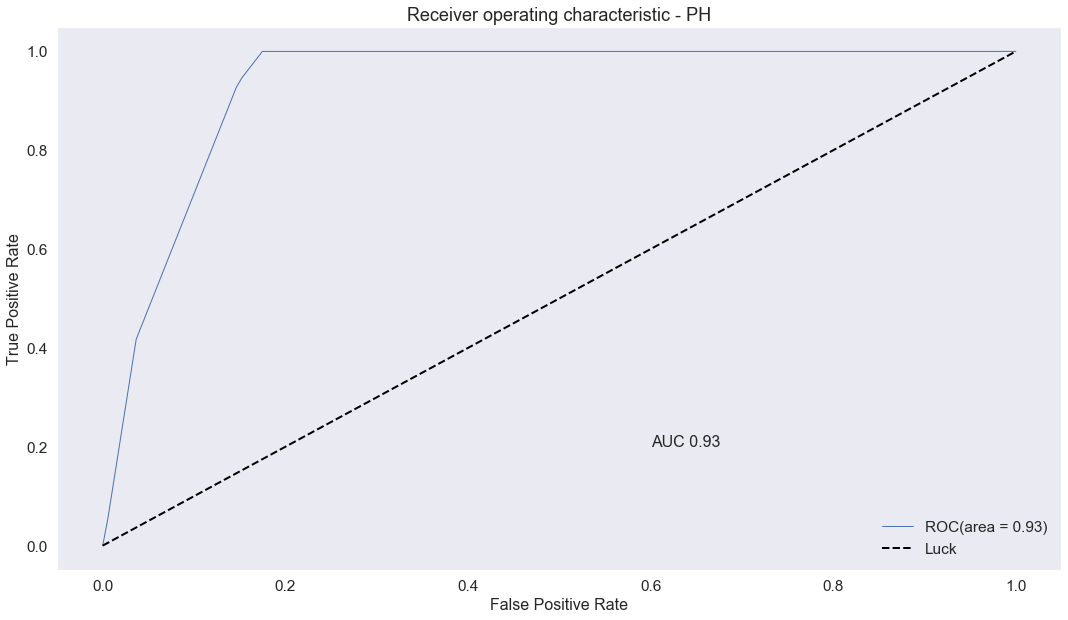

In [1246]:
## plot ROC
font=16
lw = 2
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

roc_df = pd.DataFrame()
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

ax.plot(fpr, tpr, lw=1, label='ROC(area = {})'.format(round(roc_auc, 2)))

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--', label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=font)
plt.ylabel('True Positive Rate', fontsize=font)
plt.title('Receiver operating characteristic - PH', fontsize=font+2)
# plt.legend(bbox_to_anchor=(-0.1, 1),fontsize=font)
ax.legend(loc='lower right')
ax.annotate('AUC {}'.format(round(roc_auc, 2)), xy=(.6, .2), xytext=(.6, .2), fontsize=font)
plt.grid()
plt.show();

In [1247]:
pd.DataFrame([fpr, tpr, thresholds]).transpose(
).rename(columns={0: 'fpr', 1:'tpr', 2: 'threshold'})
# we have to select the lower threshold with the least amount of fpr & tpr
# that would be 0.135824

,fpr,tpr,threshold
0,0.000000,0.000000,1.333561
1,0.005698,0.055556,0.333561
2,0.036665,0.417625,0.306183
3,0.146285,0.927203,0.139500
4,0.152358,0.946360,0.128269
5,0.174852,1.000000,0.072925
6,1.000000,1.000000,0.000000


In [1270]:
threshold = 0.139500
predict_df['predict_binary'] = 0
predict_df.loc[predict_df['predict'] > threshold, 'predict_binary'] = 1
predict_df

,predict,true,predict_binary
0,0.000094,0.0,0
1,0.141710,0.0,1
2,0.000360,0.0,0
3,0.000323,0.0,0
4,0.000195,0.0,0
...,...,...,...
13854,0.141710,1.0,1
13855,0.000728,0.0,0
13856,0.000673,0.0,0
13857,0.000864,0.0,0


In [1249]:
# baseline
sum(predict_df['predict_binary'] == predict_df['true']) / len(predict_df)

0.85648315174255

In [1250]:
# accuracy
tmp = predict_df.loc[predict_df['true'] == 1]
sum(tmp['predict_binary'] == tmp['true']) / len(tmp)

0.9272030651340997

In [1251]:
# The accuracy of selecting Phillipines is 92%, beating my baseline of 85%

In [1252]:
# feature importance
list(zip(X_train, rf_clf.feature_importances_))

[('Forced labour', 0.06944831210021765),
 ('Forced marriage', 2.3154456068463182e-05),
 ('Other', 0.12895275822921007),
 ('Sexual exploitation', 0.040335550470131445),
 ('Slavery and similar practices', 0.00628929014294711),
 ('Albania', 5.5399467261872565e-06),
 ('Bangladesh', 1.0796407226438572e-06),
 ('Belarus', 0.007216617847797084),
 ('Bolivia (Plurinational State of)', 0.0),
 ('Bulgaria', 0.0007699667298937845),
 ('Burkina Faso', 3.895563699710025e-06),
 ('Cambodia', 0.0017799998260581544),
 ('China', 3.985465122947598e-06),
 ('Colombia', 1.0879337155893359e-06),
 ('Congo (the Democratic Republic of the)', 8.669939557012193e-06),
 ("Côte d'Ivoire", 0.0),
 ('El Salvador', 2.5809451299721372e-05),
 ('Eritrea', 9.882416512231383e-05),
 ('Ghana', 0.00019245698597141582),
 ('Guinea', 5.3017019453473355e-05),
 ('Guinea-Bissau', 7.143748520290593e-05),
 ('Haiti', 0.0007061697570136955),
 ('India', 0.0),
 ('Indonesia', 0.005186092829243843),
 ('Kazakhstan', 1.18067591457198e-07),
 ('Kore

# Logistic Regression

In [1253]:
data_dummies['response'] = data_dummies['country_exploitation']
data_dummies.loc[~data_dummies['response'].isin(['PH']), 'response'] = 'other'
data_dummies['response_num'] = pd.factorize(data_dummies['response'])[0]


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['Forced labour', 'Forced marriage', 'Other',
       'Sexual exploitation', 'Slavery and similar practices', 'Albania',
       'Bangladesh', 'Belarus', 'Bolivia (Plurinational State of)', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'China', 'Colombia',
       'Congo (the Democratic Republic of the)', "Côte d'Ivoire",
       'El Salvador', 'Eritrea', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'India', 'Indonesia', 'Kazakhstan', 'Korea (the Republic of)',
       'Kyrgyzstan', "Lao People's Democratic Republic (the)", 'Madagascar',
       'Mali', 'Mexico', 'Moldova (the Republic of)', 'Myanmar', 'Nepal',
       'Niger (the)', 'Nigeria', 'Philippines (the)', 'Romania', 'Senegal',
       'Sierra Leone', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Turkmenistan',
       'Uganda', 'Ukraine', 'United States of America (the)', 'Uzbekistan',
       'Viet Nam'] 

X = data_dummies[feature_cols]
y = data_dummies.response_num

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

logreg.fit(X_train,y_train)

probs = logreg.predict_proba(X_test)

logreg.score(X_test, y_test)

C:\Users\algc_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9626957211920052

In [1254]:
y.value_counts()/y.count()

0    0.964138
1    0.035862
Name: response_num, dtype: float64

In [1255]:
predict_df = pd.DataFrame([probs[:, 1], y_test]).transpose().rename(columns={0:'predict', 1:'true'})

predict_df

,predict,true
0,0.000094,0.0
1,0.141710,0.0
2,0.000360,0.0
3,0.000323,0.0
4,0.000195,0.0
...,...,...
13854,0.141710,1.0
13855,0.000728,0.0
13856,0.000673,0.0
13857,0.000864,0.0


In [1256]:
pd.DataFrame([fpr, tpr, thresholds]).transpose(
).rename(columns={0: 'fpr', 1:'tpr', 2: 'threshold'})

,fpr,tpr,threshold
0,0.000000,0.000000,1.333561
1,0.005698,0.055556,0.333561
2,0.036665,0.417625,0.306183
3,0.146285,0.927203,0.139500
4,0.152358,0.946360,0.128269
5,0.174852,1.000000,0.072925
6,1.000000,1.000000,0.000000


In [1257]:
threshold = 0.136791
predict_df['predict_binary'] = 0
predict_df.loc[predict_df['predict'] > threshold, 'predict_binary'] = 1
predict_df

,predict,true,predict_binary
0,0.000094,0.0,0
1,0.141710,0.0,1
2,0.000360,0.0,0
3,0.000323,0.0,0
4,0.000195,0.0,0
...,...,...,...
13854,0.141710,1.0,1
13855,0.000728,0.0,0
13856,0.000673,0.0,0
13857,0.000864,0.0,0


In [1258]:
# probability that the country is Philippines
sum(predict_df['predict_binary'] == predict_df['true']) / len(predict_df)

0.8491954686485317

In [1259]:
# model accuracy
tmp = predict_df.loc[predict_df['true'] == 1]
sum(tmp['predict_binary'] == tmp['true']) / len(tmp)

0.9400386847195358

### Evaluation

In [1260]:
# accuracy
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9626957211920052

In [1261]:
metrics.accuracy_score(y_test, y_pred)

0.9626957211920052

In [1262]:
logreg.predict_proba(X)[10:20]
# array [0, 1]
# 0 = other, 1 = PH

array([[9.99804707e-01, 1.95293250e-04],
       [9.99804707e-01, 1.95293250e-04],
       [9.99804707e-01, 1.95293250e-04],
       [9.99190762e-01, 8.09238233e-04],
       [9.99190762e-01, 8.09238233e-04],
       [9.99190762e-01, 8.09238233e-04],
       [9.99190762e-01, 8.09238233e-04],
       [9.99190762e-01, 8.09238233e-04],
       [9.99190762e-01, 8.09238233e-04],
       [9.99190762e-01, 8.09238233e-04]])

In [1263]:
# roc_auc score
metrics.roc_auc_score(y_test,y_pred)

0.5

In [1264]:
metrics.log_loss(y_test,y_pred)

1.2884441443227386

#### Confusion Matrix

In [1265]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[13342,     0],
       [  517,     0]], dtype=int64)

Confusion matrix, without normalization
[[13342     0]
 [  517     0]]


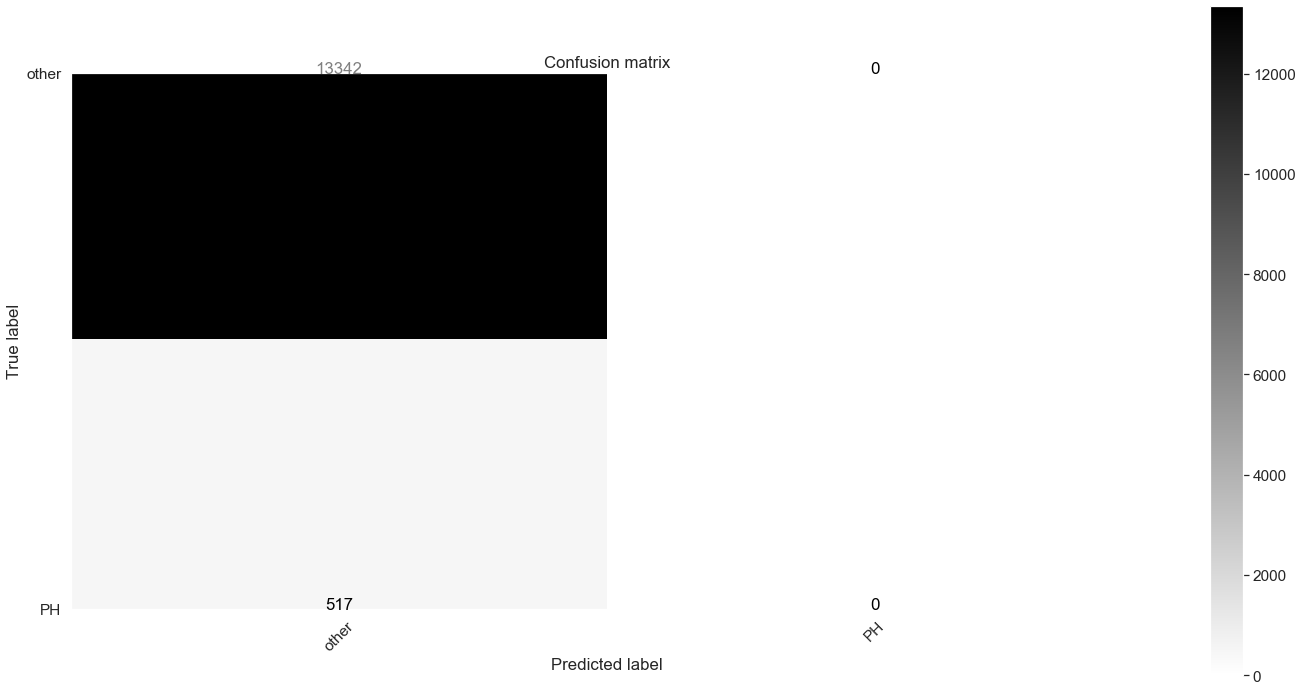

In [1266]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['other', 'PH']

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.4)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix', cmap='binary')

#### Classification Report

In [1267]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13342
           1       0.00      0.00      0.00       517

    accuracy                           0.96     13859
   macro avg       0.48      0.50      0.49     13859
weighted avg       0.93      0.96      0.94     13859



C:\Users\algc_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall gives us an idea about when it's actually yes, how often does it predict yes: 98%

Precision tells us about when it predicts yes, how often is it correct: 98%

#### Probabilities

In [1268]:
y_pp = logreg.predict_proba(X_test)
y_pp
# first column, the probability of response_num = 0 (other),
# the second column, probability of response_num = 1 (PH).

array([[9.99905888e-01, 9.41124970e-05],
       [8.58289639e-01, 1.41710361e-01],
       [9.99640456e-01, 3.59543575e-04],
       ...,
       [9.99326642e-01, 6.73357914e-04],
       [9.99135942e-01, 8.64057833e-04],
       [9.99298671e-01, 7.01329335e-04]])

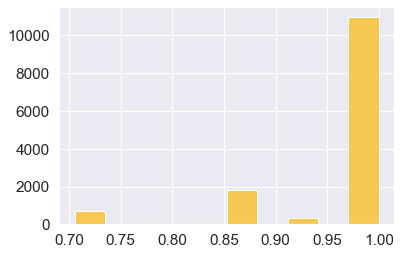

(array([10961.,     0.,   353.,     0.,  1833.,     0.,     0.,     0.,
            0.,   712.]),
 array([7.29597886e-05, 2.95203736e-02, 5.89677875e-02, 8.84152014e-02,
        1.17862615e-01, 1.47310029e-01, 1.76757443e-01, 2.06204857e-01,
        2.35652271e-01, 2.65099684e-01, 2.94547098e-01]),
 <a list of 10 Patch objects>)

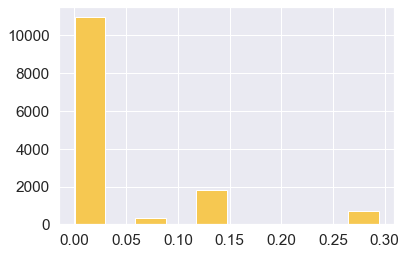

In [1269]:
y_pp_t = y_pp.transpose()

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pp_t[0], color='#f6c851')
plt.show()
plt.hist(y_pp_t[1], color='#f6c851')